### Data is from FRED (Fedral Reserve Economic Database)
#### Data on clothing and clothing accessory store sales from 1992 to 2019
https://fred.stlouisfed.org/series/MRTSSM448USN



In [1]:
import pandas as pd
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('../DATA/RSCCASN.csv',parse_dates=True, index_col = 'DATE')
# "parse_dates" makes datetime variable available as datetime format

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 334 entries, 1992-01-01 to 2019-10-01
Data columns (total 1 columns):
RSCCASN    334 non-null int64
dtypes: int64(1)
memory usage: 5.2 KB


In [4]:
df

,RSCCASN
DATE,
1992-01-01,6938
1992-02-01,7524
1992-03-01,8475
1992-04-01,9401
1992-05-01,9558
...,...
2019-06-01,21123
2019-07-01,21714
2019-08-01,23791


In [5]:
df.columns = ['Sales']

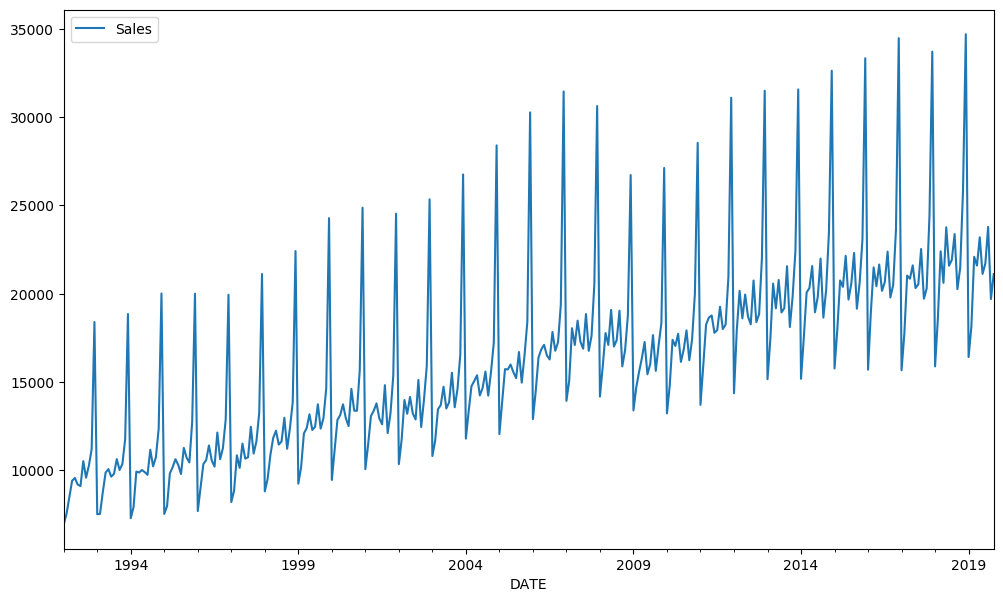

In [6]:
df.plot(figsize = (12,7))

In [7]:
len(df)

334

In [8]:
# divide the data into test and training portion
# test month = 18 months
test_size = 18
test_ind = len(df) -  test_size

In [9]:
train = df.iloc[:test_ind]
test = df.iloc[test_ind:]

In [10]:
train

,Sales
DATE,
1992-01-01,6938
1992-02-01,7524
1992-03-01,8475
1992-04-01,9401
1992-05-01,9558
...,...
2017-12-01,33720
2018-01-01,15881
2018-02-01,18585


In [11]:
test

,Sales
DATE,
2018-05-01,23764
2018-06-01,21589
2018-07-01,21919
2018-08-01,23381
2018-09-01,20260
2018-10-01,21473
2018-11-01,25831
2018-12-01,34706
2019-01-01,16410


In [12]:
from sklearn.preprocessing import MinMaxScaler

In [13]:
scaler = MinMaxScaler()

In [14]:
scaler.fit(train)

MinMaxScaler(copy=True, feature_range=(0, 1))

In [15]:
scaled_train = scaler.transform(train)

In [16]:
scaled_test = scaler.transform(test)

In [17]:
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator

In [18]:
# length is batch size.
length = 12
generator = TimeseriesGenerator(scaled_train, scaled_train,
                               length=length, batch_size = 1)


In [19]:
X,y = generator[0]

In [20]:
X

array([[[0.        ],
        [0.02127505],
        [0.05580163],
        [0.08942056],
        [0.09512053],
        [0.08146965],
        [0.07860151],
        [0.12979233],
        [0.09566512],
        [0.1203892 ],
        [0.15426227],
        [0.41595266]]])

In [21]:
y

array([[0.02047633]])

In [22]:
scaled_train

array([[0.        ],
       [0.02127505],
       [0.05580163],
       [0.08942056],
       [0.09512053],
       [0.08146965],
       [0.07860151],
       [0.12979233],
       [0.09566512],
       [0.1203892 ],
       [0.15426227],
       [0.41595266],
       [0.02047633],
       [0.02127505],
       [0.06636654],
       [0.10633895],
       [0.11345484],
       [0.09791606],
       [0.10368864],
       [0.13396747],
       [0.11163956],
       [0.12372931],
       [0.17506535],
       [0.43250799],
       [0.0124165 ],
       [0.03499855],
       [0.10829945],
       [0.10641156],
       [0.11149434],
       [0.10728289],
       [0.10154662],
       [0.1531731 ],
       [0.11904589],
       [0.13767064],
       [0.19663085],
       [0.47480395],
       [0.02105722],
       [0.03714058],
       [0.10445106],
       [0.11726692],
       [0.13367703],
       [0.12209556],
       [0.10332559],
       [0.1570578 ],
       [0.13694453],
       [0.12710572],
       [0.21104415],
       [0.474

### Lesson 86 (processing the model)


In [23]:
from tensorflow.keras.models import Sequential

In [24]:
from tensorflow.keras.layers import Dense, LSTM

In [25]:
n_features = 1

In [26]:
model = Sequential()
model.add(LSTM(100, activation='relu', input_shape=(length,n_features)))
model.add(Dense(1))
model.compile(optimizer = 'adam', loss ='mse')

In [27]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 100)               40800     
_________________________________________________________________
dense (Dense)                (None, 1)                 101       
Total params: 40,901
Trainable params: 40,901
Non-trainable params: 0
_________________________________________________________________


#### create a test generator

In [28]:
from tensorflow.keras.callbacks import EarlyStopping

In [29]:
# 
early_stop = EarlyStopping(monitor = 'val_loss', patience = 2)

In [30]:
validation_generator = TimeseriesGenerator(scaled_test,scaled_test,
                                          length=length, batch_size = 1)

In [31]:
model.fit_generator(generator, epochs=20,
                   validation_data=validation_generator,
                   callbacks=[early_stop])

Epoch 1/20
304/304 [==============================] - 7s 23ms/step - loss: 0.0282 - val_loss: 0.0033
Epoch 2/20
304/304 [==============================] - 7s 23ms/step - loss: 0.0166 - val_loss: 0.0040
Epoch 3/20
304/304 [==============================] - 7s 24ms/step - loss: 0.0092 - val_loss: 7.4664e-04
Epoch 4/20
304/304 [==============================] - 7s 23ms/step - loss: 0.0069 - val_loss: 0.0025
Epoch 5/20
304/304 [==============================] - 7s 22ms/step - loss: 0.0034 - val_loss: 0.0033


In [32]:
losses = pd.DataFrame(model.history.history)

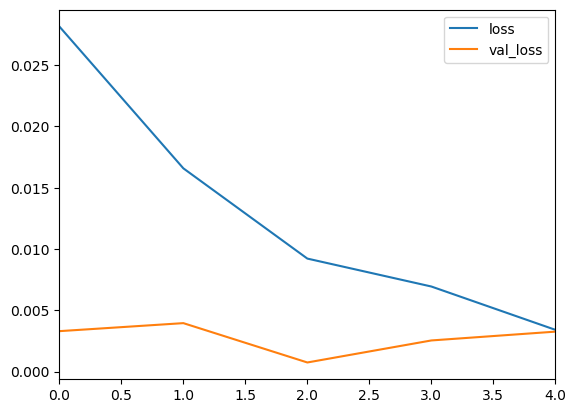

In [33]:
losses.plot()

In [34]:
test_predictions = []

first_eval_batch = scaled_train[-length:]
current_batch = first_eval_batch.reshape((1, length, n_features))

for i in range(len(test)):
    
    # get prediction 1 time stamp ahead ([0] is for grabbing just the number instead of [array])
    current_pred = model.predict(current_batch)[0]
    
    # store prediction
    test_predictions.append(current_pred) 
    
    # update batch to now include prediction and drop first value
    current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis=1)

In [35]:
true_predictions = scaler.inverse_transform(test_predictions)

In [36]:
test['Predictions'] = true_predictions

C:\Users\te521690\.conda\envs\mytfenv\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [37]:
test

,Sales,Predictions
DATE,,
2018-05-01,23764,22533.237627
2018-06-01,21589,21560.797709
2018-07-01,21919,21775.456566
2018-08-01,23381,23446.802735
2018-09-01,20260,21260.329488
2018-10-01,21473,21817.202993
2018-11-01,25831,26234.637637
2018-12-01,34706,37512.355904
2019-01-01,16410,18548.352481


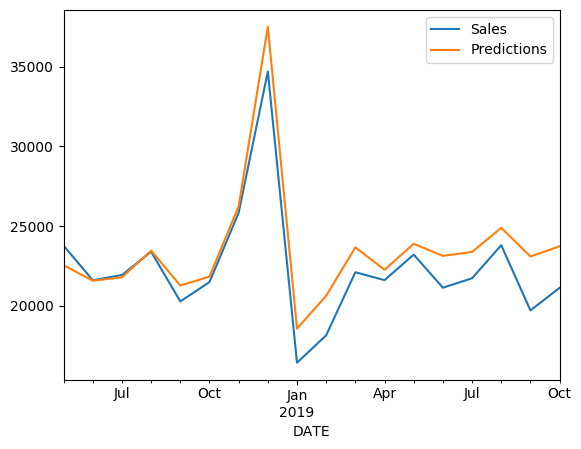

In [38]:
test.plot()
# depending on the plot, you have some options to get a better result such as adding or removing neurons
# then you can retain the model

In [39]:
# from here, we will try to predict unknown future
# 1. scale
# 2. retrain
# 3. forecast

full_scaler = MinMaxScaler()
scaled_full_data = full_scaler.fit_transform(df)

In [40]:
length = 12
generator = TimeseriesGenerator(scaled_full_data, scaled_full_data,
                               length=length, batch_size = 1)

In [41]:
model = Sequential()
model.add(LSTM(100, activation = 'relu', input_shape=(length, n_features)))
model.add(Dense(1))
model.compile(optimizer = 'adam',loss='mse')

model.fit_generator(generator, epochs = 8)

# if we can split train-test data set, we can do early stopping to "predict" test data set.
# however, in this case, we use the entire data set to train a model and forecast unknown future. So we can't do early
# stopping technique.
# The number of "epochs" is defined by the validation loss plot in the early stages (see above. in the video, validation
# loss was minimum at the cycle 8. That's why epoch is set at 8 in this case)


Epoch 1/8
322/322 [==============================] - 7s 23ms/step - loss: 0.0226
Epoch 2/8
322/322 [==============================] - 9s 27ms/step - loss: 0.0153
Epoch 3/8
322/322 [==============================] - 8s 24ms/step - loss: 0.0065
Epoch 4/8
322/322 [==============================] - 7s 23ms/step - loss: 0.0033
Epoch 5/8
322/322 [==============================] - 8s 24ms/step - loss: 0.0027
Epoch 6/8
322/322 [==============================] - 7s 23ms/step - loss: 0.0020
Epoch 7/8
322/322 [==============================] - 7s 23ms/step - loss: 0.0014
Epoch 8/8
322/322 [==============================] - 8s 24ms/step - loss: 0.0016


In [44]:
forecast = []

# Replace periods with whatever forecast length you want
periods = 12

# take the last 12 months of training set to predict one month value

first_eval_batch = scaled_train[-length:]
current_batch = first_eval_batch.reshape((1, length, n_features))

for i in range(periods):
    
    # get prediction 1 time stamp ahead ([0] is for grabbing just the number instead of [array])
    current_pred = model.predict(current_batch)[0]
    
    # store prediction
    forecast.append(current_pred) 
    
    # update batch to now include prediction and drop first value
    current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis=1)

In [45]:
forecast = scaler.inverse_transform(forecast)
# these forecast values are for prediciton in 2020 and later 

In [46]:
# these are for 2020. The original df has a time stamp such as "2018-04-01"
forecast

array([[20028.89196348],
       [19105.17345023],
       [19242.79891825],
       [20674.26155782],
       [18669.44141889],
       [19101.71264052],
       [22132.91814995],
       [30245.45669174],
       [15537.3249042 ],
       [17503.30697632],
       [20418.48506427],
       [19053.88681149]])

In [47]:
# so we need to add the time stamp to the forecast values
forecast_index = pd.date_range(start='2019-11-01', periods = periods,
                               freq = 'MS')

In [48]:
forecast_index

DatetimeIndex(['2019-11-01', '2019-12-01', '2020-01-01', '2020-02-01',
               '2020-03-01', '2020-04-01', '2020-05-01', '2020-06-01',
               '2020-07-01', '2020-08-01', '2020-09-01', '2020-10-01'],
              dtype='datetime64[ns]', freq='MS')

In [51]:
forecast_df = pd.DataFrame(data = forecast, index=forecast_index,
                         columns = ['Forecast'] )

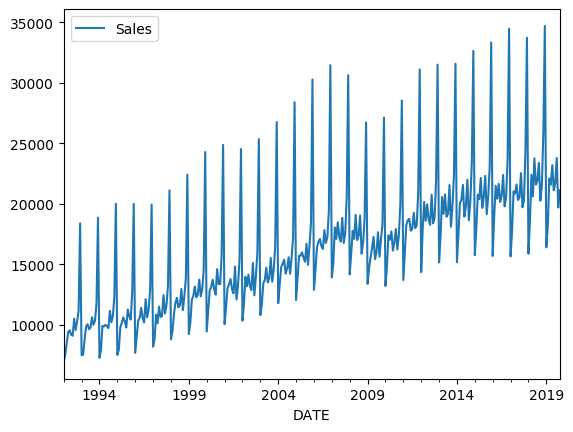

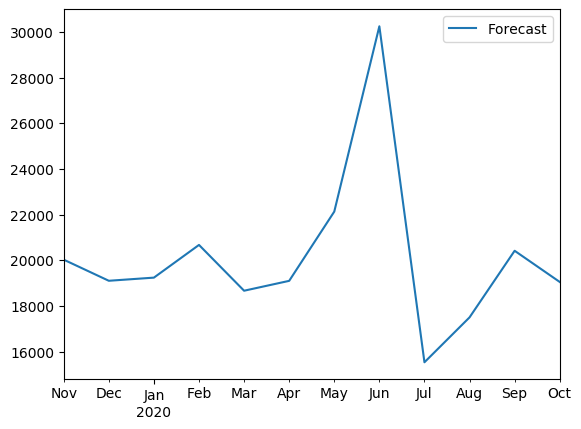

In [54]:
df.plot()
forecast_df.plot()

(576, 611)

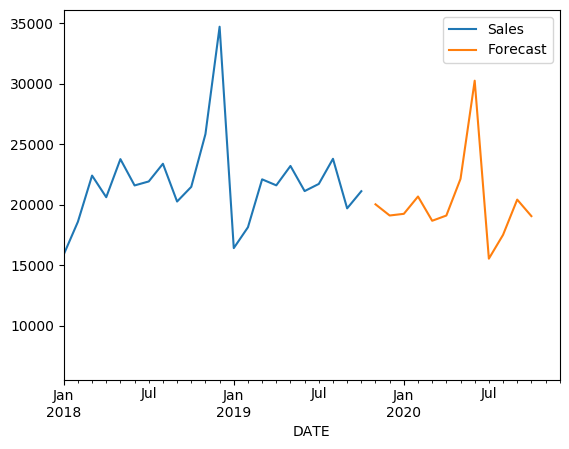

In [59]:
ax = df.plot()
forecast_df.plot(ax = ax)
# ↑ the code shows all plots from 1994
# if we want to focus on a narrower range, do as follows
plt.xlim('2018-01-01','2020-12-01')